**<center> <span style="color:#0F92BA;font-family:serif; font-size:34px;"> CUSTOMER CHURN PREDICTION 📈</span> </center>**

# <span style="font-family:serif; font-size:28px;"> Content</span>

1. [Introduction](#1)
    * [What is Customer Churn?](#2)
    * [How can customer churn be reducded?](#3)
    * [Objectives](#4)
2. [Loading libraries and data](#5)
3. [Undertanding the data](#6)
4. [Visualize missing values](#7)
5. [Data Manipulation](#8)
6. [EDA](#9)
7. [Data Visualization](#10)
8. [Data Preprocessing](#11)
   * [Encoding](#111)
9. [Machine Learning Model Evaluations and Predictions](#12)
   * [KNN](#101)
   * [SVC](#102)
   * [Random Forest](#103)
   * [Logistic Regression](#104)
   * [Decision Tree Classifier](#105)
   * [AdaBoost Classifier](#106)
   * [Gradient Boosting Classifier](#107)
   * [Voting Classifier](#108)


<a id= "1"></a>
# <span style="font-family:serif; font-size:28px;"> 1. Introduction</span>
<a id="Introduction"></a>

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.</span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself. 
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
df = pd.read_csv(r'/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

<Axes: >

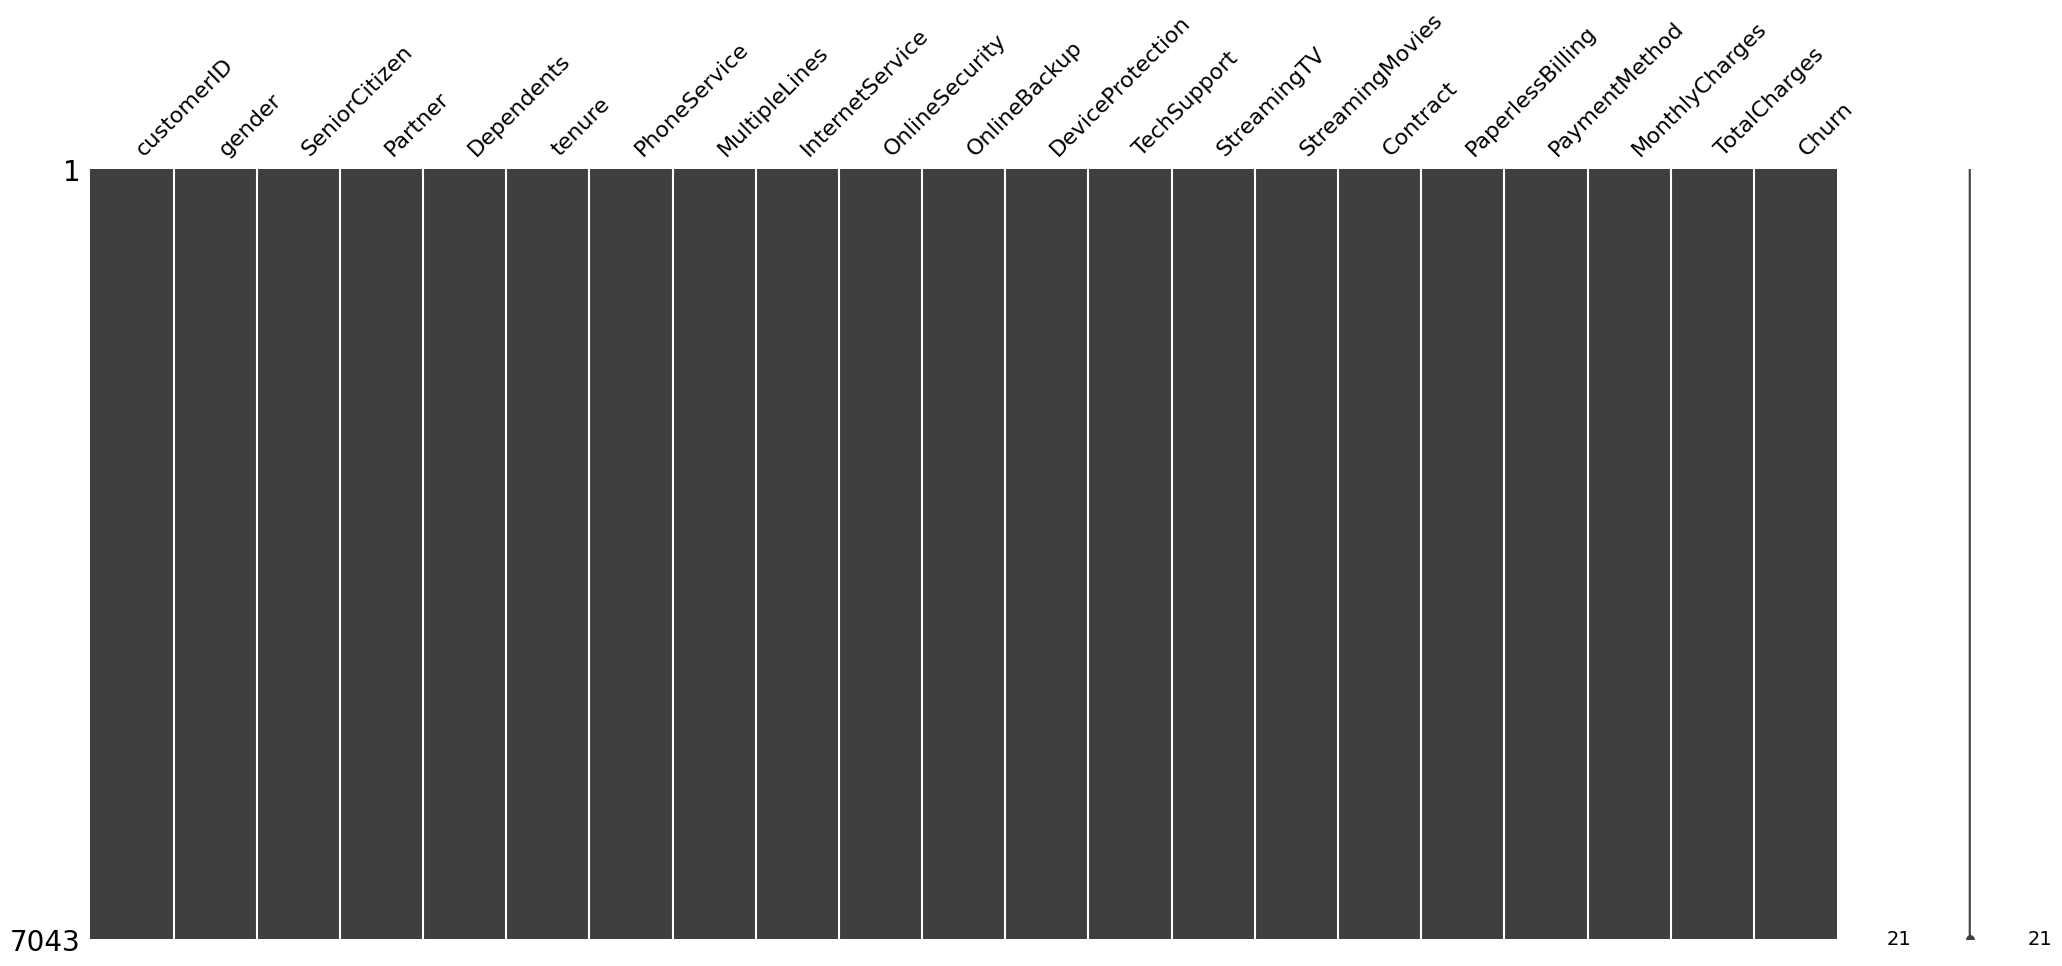

In [5]:
# Visualize missing values as a matrix
msno.matrix(df)

- No missing values found, get it by using matrix (msno)

<a id ="8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Manipulation </span>
<a id = "8"></a>



A data manipulation language is a computer programming language used for adding, deleting, and modifying data in a database.
Data manipulation is the process of organizing data to make it more understandable. Any type of data may be sorted alphabetically for easy comprehension.
- Drop
- Modify
- Check & Remove Whitespace


In [6]:
# Drop Unnecessary columns
df = df.drop(['customerID'], axis=1)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
# Check whitespace & remove accordingly
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Its found there are some whitespaces in TotalCharges

In [8]:
# check num in Total Charges column
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- Find that some client tenure is 0 while it has monthly charges!
- Lets see whether any other 0 values in tenure columns

In [9]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- No other missing values found in tenure3 except above
- Lets delete above missing values in tenuure with charges

In [10]:
df.drop(labels=df[df['tenure']==0].index, axis=0, inplace=True) # row delelation
df[df['tenure']==0].index # now no missing values

Index([], dtype='int64')

In [11]:
df['TotalCharges'].isnull().sum()

0

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<a id ="9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. EDA </span>
<a id = "9"></a>

#### Senior Citizen

In [13]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

In [14]:
# Lets map Senior Citizen 
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking Columns Types

In [15]:
df.select_dtypes('float64')

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.50
7039,103.20,7362.90
7040,29.60,346.45
7041,74.40,306.60


In [16]:
df.select_dtypes('int64')

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7038,24
7039,72
7040,11
7041,4


In [17]:
df.select_dtypes('object').columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [18]:
# Continuous Features
numerical_cols = ['tenure','MonthlyCharges','TotalCharges',]
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [19]:
df["InternetService"].describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [20]:
df["InternetService"].describe(include=['object','bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

<a id ="10"></a>
# <span style="font-family:serif; font-size:28px;"> 7. Data Visualization </span>
<a id = "10"></a>

In [21]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(  
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.81, y=0.5, font_size=20, showarrow=False)])
fig.show()

- There is kind of balanced gender ration in customer male & female 50.5:49.5
- Over 26% customer churned or discontinue from the company services

#### Customer Churn Ratio

In [22]:
# How many customer still taking service / not churn by gender- Regular Customer
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [23]:
churn_no = 2544+2619
churn_no

5163

In [24]:
# How many customer already churned by gender- Discontinuation
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

In [25]:
churn_yes = 939+930
churn_yes

1869

In [26]:
total_cus = df['gender'].count()
total_cus

7032

In [27]:
churn_rate = churn_yes/total_cus*100
churn_rate

26.578498293515356

In [28]:
print(f"Total Churn rate: {churn_rate:.2f}%")

Total Churn rate: 26.58%


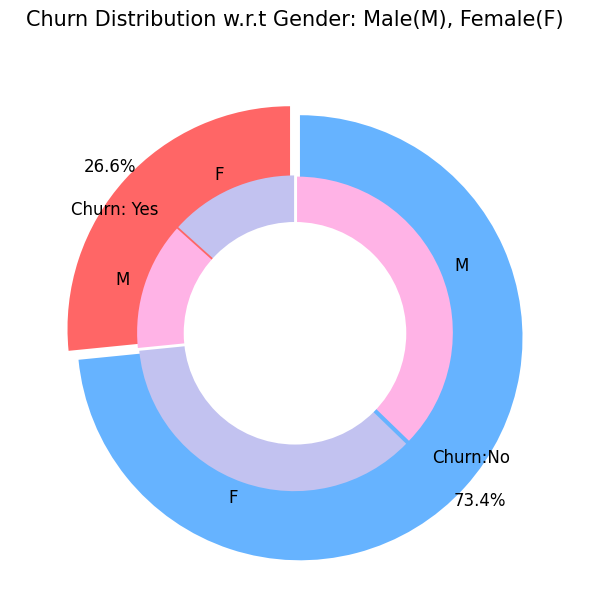

In [29]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":12}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.09, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

- It found that gender ratio is almost same who switched to another compnay (churned)

#### Customer Contact Distribution

In [30]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [32]:
fig = px.histogram(df, x="Churn", color="Contract", barmode='group', title="<b>Customer Contract Distribution</b>")
fig.update_layout(width=800, height=500, bargap=0.1)
fig.show()

* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [33]:
1655+166+48

1869

In [34]:
1655/1869

0.8855002675227395

#### Mode of Payment

In [35]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.25)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [36]:
import plotly.graph_objects as go

# Your existing data
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

# Define custom colors (you can add more colors as needed)
custom_colors = ['#FF9993', '#66B2FF', '#99FF99', '#FFCC39']

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.25, marker=dict(colors=custom_colors))])

# Customize the layout
fig.update_layout(title_text="<b>Payment Method Distribution</b>")

# Show the chart
fig.show()


In [37]:
# Lets check the churning with payment method
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b> Customer Payment Method Distribution</b>")
fig.update_layout(width=700, height=500, bargap=.1)
fig.show()

* It found that those customer are in "Electronic Payment Method" more chances of getting churn 
* Customer have Credit Card (automatic)/ Back Transfer less likely to be churned


### Internet Service & Churn Status by Gender

In [38]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [39]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [40]:
# Filtering by Male & Churn Status
df[df['gender']=="Male"][['InternetService','Churn']].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [41]:
# Filtering by Female & Churn Status
df[df['gender']=="Female"][['InternetService','Churn']].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

In [42]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ['Female','Male','Female','Male']],
    y = [965, 992, 219,240],
    name = "DSL",
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
    x = [['Churn:No','Churn:No','Churn:Yes','Churn:Yes'],
        ['Female','Male','Female','Male']],
    y = [690,717,56,57],
    name = 'No Internet'
))

## Ploting
fig.update_layout(title_text='<b> Churn Distribution by Internet Service & Gender')
fig.show()

#### Findings

* It found that there are significant higher churn rate at Fiber Optic, suggesting improving Fiber optic service
* DSL having the less churn rate then Fiber Optic

#### Dependents

In [43]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

In [44]:
color_map = {"Yes":"#6897BB" , "No":"#0A4468"} # Hexa Color
fig = px.histogram(df, x='Churn', color='Dependents', barmode='group', title="<b> Dependents Distribution",
                  color_discrete_map=color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

* Customer Without Dependents are more likely to churn

#### Partners

In [45]:
df['Partner'].value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

In [46]:
color_map = {"Yes": "#00CC96", "No":"#668F25"}
fig = px.histogram(df, x='Churn', color='Partner', barmode='group',
                   title="<b> Churn Distribution by Partner</b>",
                   color_discrete_map=color_map,
                  )
## Size & Display
fig.update_layout(width=700, height=500, bargap=0.3)
fig.show()

* Customer without partner are more likely to churn

#### Senior Citizen

In [47]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64

In [48]:
color_map = {"Yes": "#00CC96", "No":"#668F25"}
fig = px.histogram(df, x='Churn', color='SeniorCitizen', barmode='group',
                  title="<b> Churn Distribution by Senior Citizen</b>",
                   color_discrete_map= color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.4)
fig.show()

In [49]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution by Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* More churn found in Senior Citizen

### Online Security

In [50]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

In [51]:
color_map = {"Yes": "#FF97FF", "No": "#8B0000"}
fig = px.histogram(df, x='Churn', color='OnlineSecurity',
                  barmode='group',title="<b> Churn Distribution by Online Security</a>",
                   color_discrete_map=color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()


* Most customer churn in the absence of online security

### PaperlessBilling

In [52]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64

In [53]:
color_map = {"Yes":'#5FFF40' , "No":'#805b46'}
fig = px.histogram(df, x="Churn", color='PaperlessBilling',
                  title="<b> Churn Distribution by PaperlessBilling",
                   color_discrete_map=color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.3)
fig.show()

* Customer with Paperless billing are most likely to churn

### Tech Support

In [54]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  
                   title="<b>Chrun distribution TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customer without tech support are most likely to churn

#### Phone Service

In [55]:
color_map = {"Yes": "#FF97FF", "No": "#8B0000"}
fig = px.histogram(df, x='Churn',color='PhoneService',
                  barmode='group', title="<b> Churn Distribution by PhoneService</b>",
                   color_discrete_map=color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

* Customer have no phone service are more likely to churn

In [56]:
df.select_dtypes('object').columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [57]:
color_map = {"Yes": "#FF97FF", "No": "#8B0000"}
fig = px.histogram(df, x='Churn',color='MultipleLines',
                  barmode='group', title="<b> Churn Distribution by MultipleLines</b>",
                   color_discrete_map=color_map
                  )
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

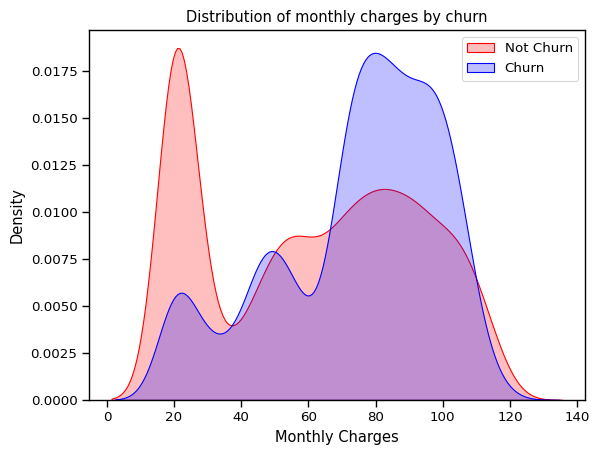

In [58]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

* It found that for higher monthly charges, more likely to churn

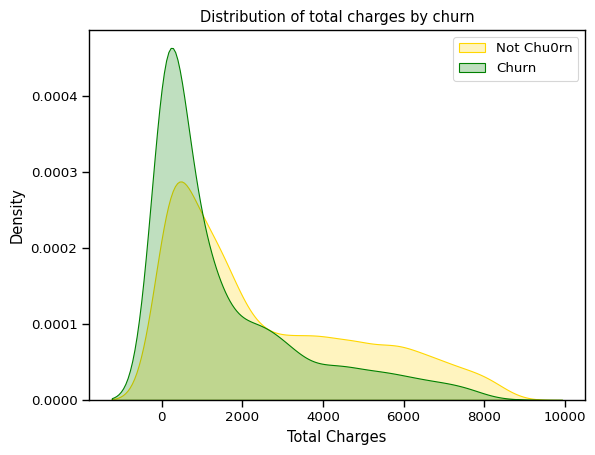

In [59]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [60]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

* New Customers are more likely to churn

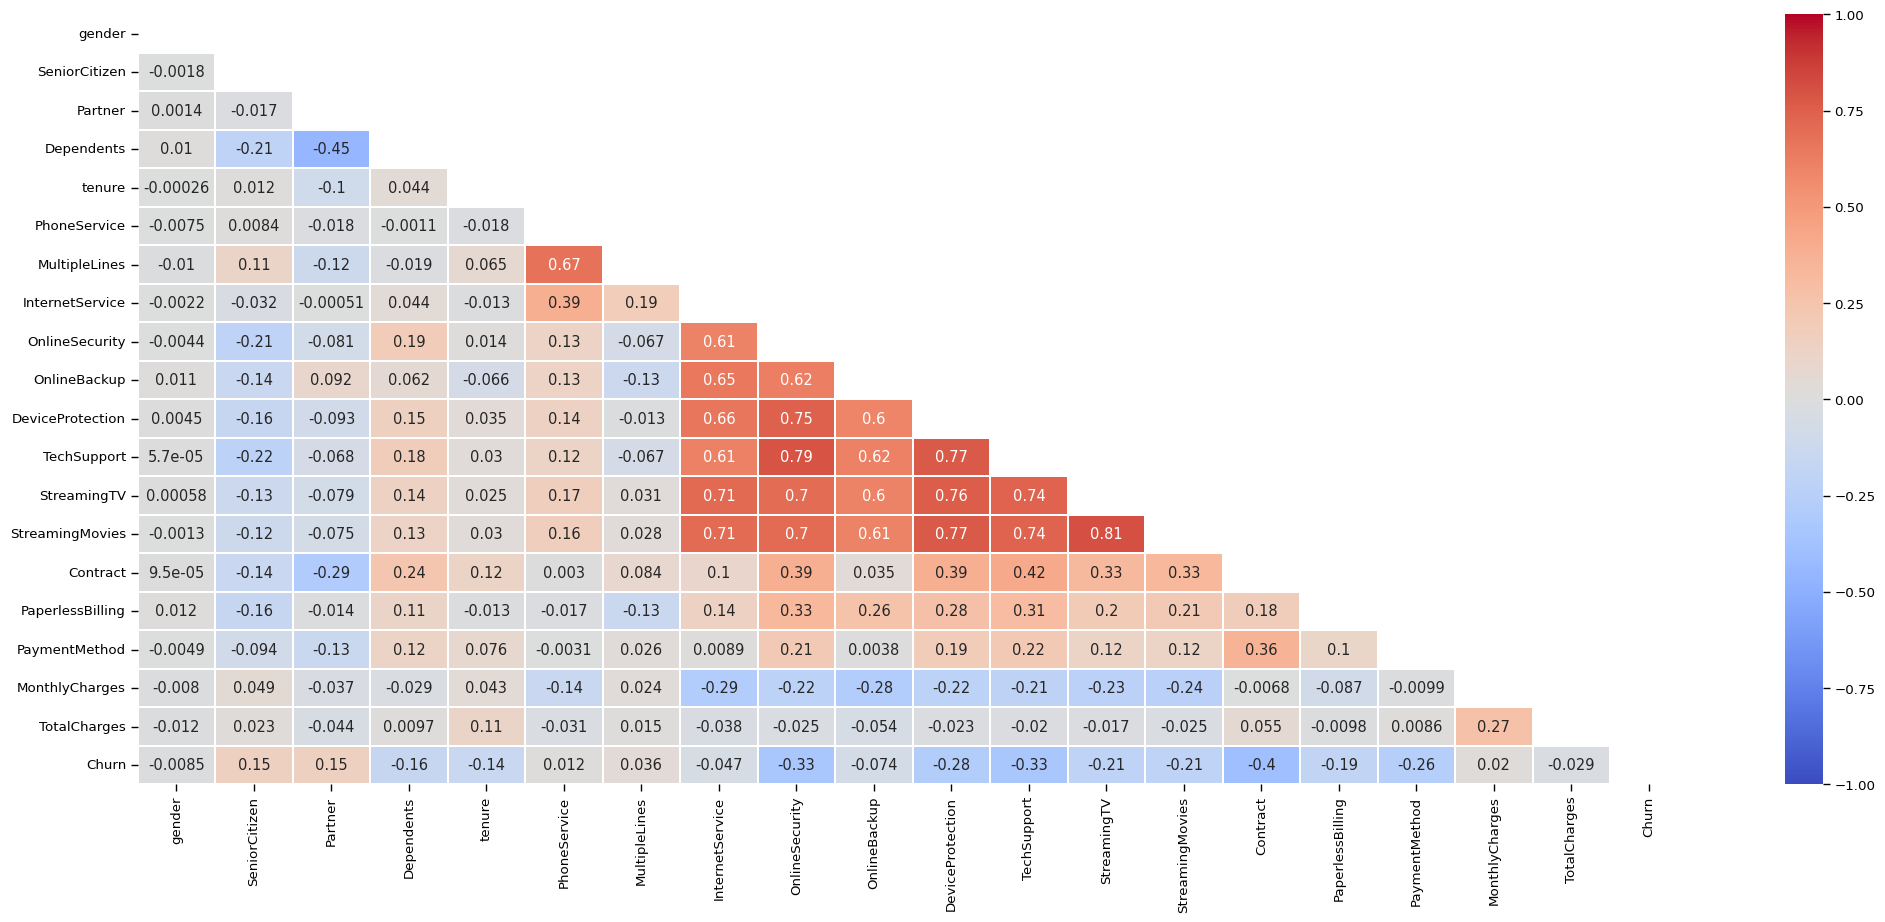

In [61]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, 
                 annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

* Comperative Higher correlation is between Churn & (SeniorCitizen, Partnership)

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Data Preprocessing</span>
<a id = "11" ></a>

#### 8.1 Categorical Encoding

In [62]:
# Categorical Encoding
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [63]:
    df = df.apply(lambda x: object_to_int(x))
    df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

#### 8.2 Correlation Checking

In [65]:
# Checking Features corr with target (Churn)
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

* Mothly Charges & Paperless billing having comperative max correlation

#### 8.3 Splitting Data & Training

In [66]:
X = df.drop(columns=['Churn']) # Features
y = df['Churn'].values         # Target

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

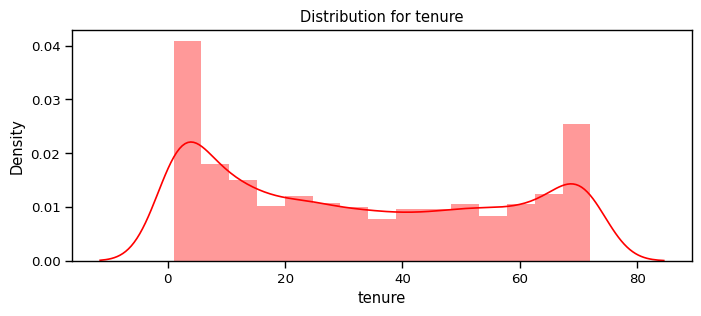

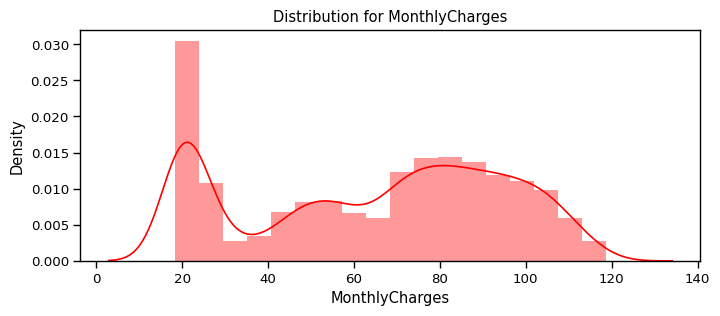

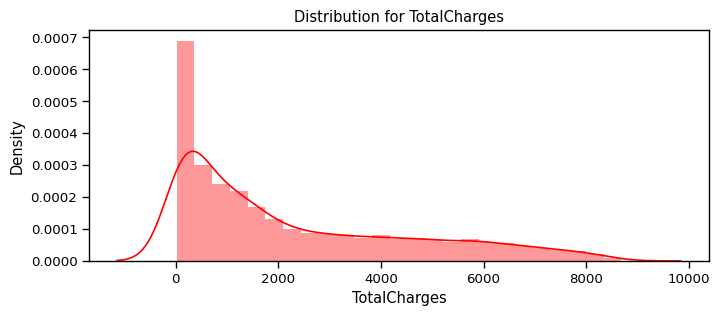

In [68]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)
    
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range. 

<a id = "111" ></a>
#### **Encoding-Standardizing**
<a id = "Encoding" ></a>

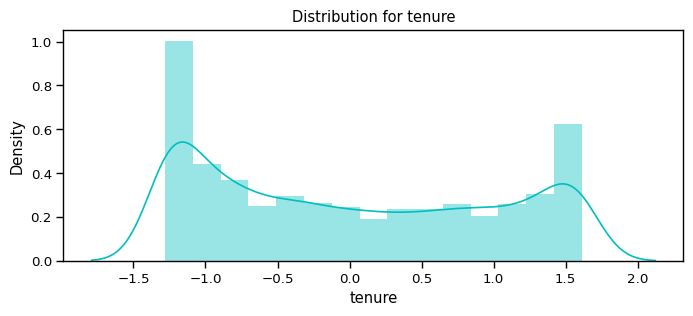

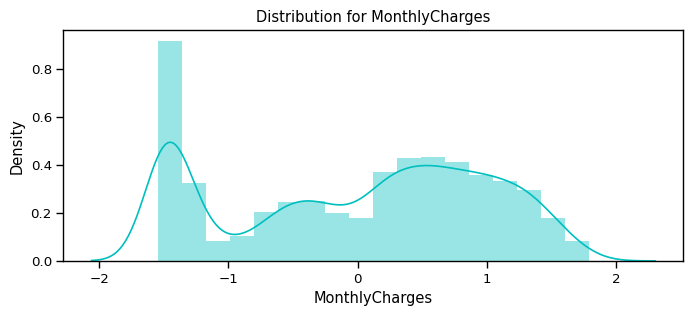

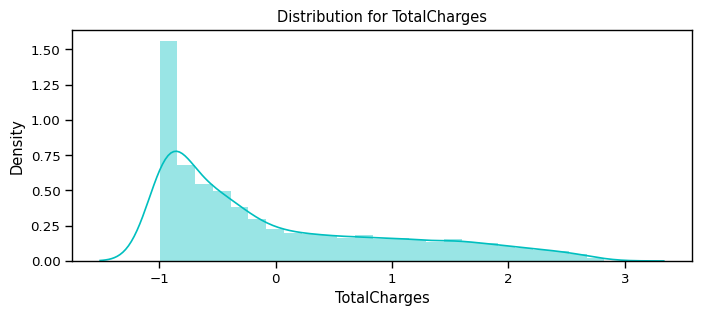

In [69]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                     columns = num_cols
                     )
for feat in numerical_cols: distplot(feat, df_std, color='c')   # numerical_cols defined earlier

#### 8.5 Columns Categorization for different purpose ( Standardization, Label  & One Hot Encoding)

In [70]:
cat_cols_ohe = ['PaymentMethod','Contract','InternetService']             # For those one-hot encoding considered to be useful
cat_cols_le = list(set(X_train.columns)- set(num_cols)-set(cat_cols_ohe)) # For those Label encoding considered to be useful

In [71]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

<a id = "12" ></a>
# <span style="font-family:serif; font-size:28px;"> 9. Model Evaluation and Predictions </span>
<a id = "12" ></a>

<a id="101"></a>
#### <b> 1. KNN </b>
<a id="KNN"></a>

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.7791469194312797


In [73]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1549
           1       0.59      0.53      0.56       561

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



<a id="102"></a>
#### <b> 2. SVC </b>
<a id="SVC"></a>

In [74]:
svc_model = SVC(random_state=1)
svc_model.fit(X_train, y_train)
predicted_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM Accuracy is :", accuracy_svc)

SVM Accuracy is : 0.8075829383886256


In [75]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



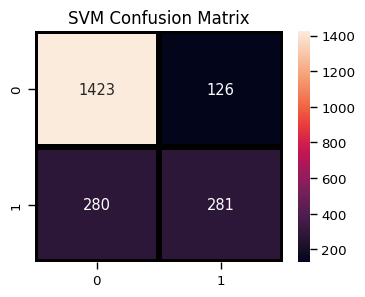

In [76]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y),
           annot=True, fmt="d", linecolor="k", linewidths=3
           )
plt.title("SVM Confusion Matrix", fontsize=12)
plt.show()

<a id="103"></a>
#### <b> 3. Random Forest </b>
<a id="rf"></a>

In [77]:
model_rf = RandomForestClassifier(n_estimators=500, 
                                  oob_score=True,
                                  n_jobs = -1,
                                  random_state=42,
                                  max_features = "auto",
                                  max_leaf_nodes=30
                                 )
model_rf.fit(X_train, y_train)
predicted_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_test))

0.8099526066350711


In [78]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.70      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



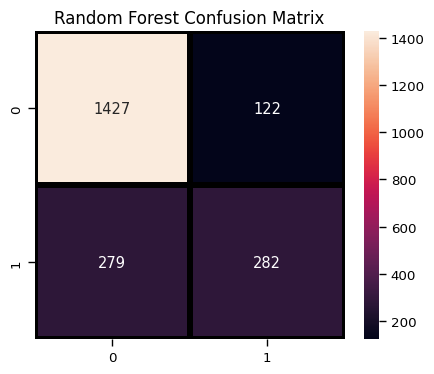

In [79]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, predicted_test),
           annot=True, fmt="d", linecolor="k", linewidths=3
           )
plt.title("Random Forest Confusion Matrix", fontsize=12)
plt.show()

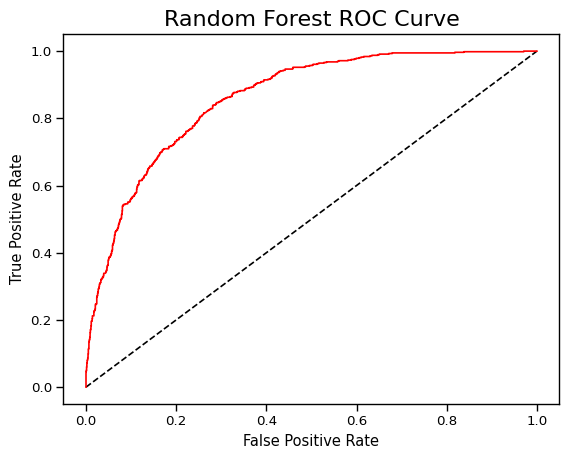

In [80]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

<a id="104"></a>
#### <b> 4. Logistic Regression </b>
<a id="lr"></a>

In [81]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression Accuracy is :", accuracy_lr)

Logistic Regression Accuracy is : 0.8080568720379147


In [82]:
# Classification Report
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.74      2110
weighted avg       0.80      0.81      0.80      2110



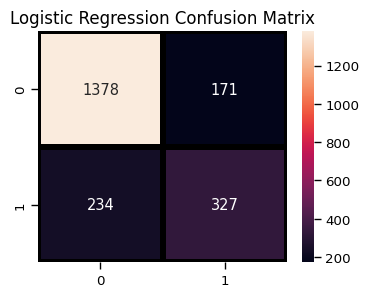

In [83]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
           annot=True, fmt="d", linecolor="k", linewidths=3
           )
plt.title("Logistic Regression Confusion Matrix", fontsize=12)
plt.show()

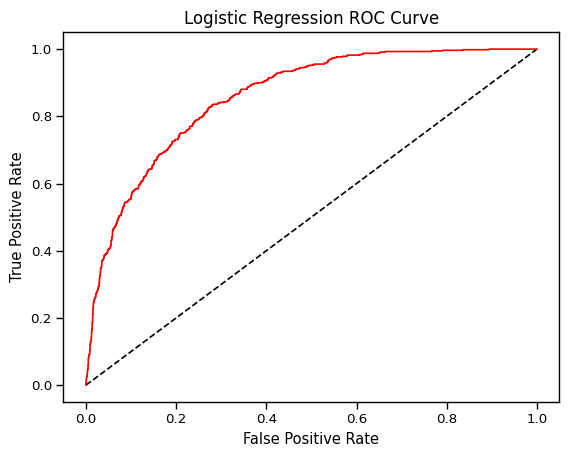

In [84]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1], [0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=12)
plt.show()

<a id="105"></a>
#### <b> 5. Decision Tree Classifer </b>
<a id="lr"></a>

In [85]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Dicision Tree Accuracy is :", accuracy_dt)

Dicision Tree Accuracy is : 0.7364928909952607


In [86]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.50      0.54      0.52       561

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



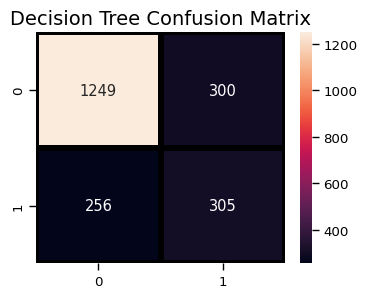

In [87]:
# Confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
           annot=True, fmt="d", linecolor='k', linewidths=3
           )
plt.title("Decision Tree Confusion Matrix", fontsize=14)
plt.show()


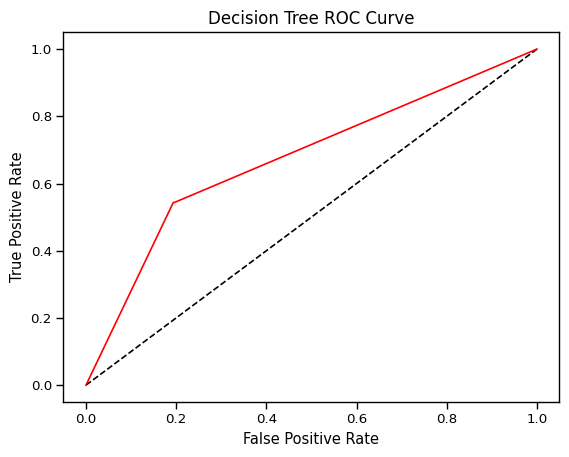

In [88]:
# ROC Curve
y_pred_prob = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Decision Tree Classifier', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve', fontsize=12)
plt.show()

ROC Curve showing the performance is not good!

<a id = "106"></a>
#### **6. AdaBoost Classifier**
<a id = "ada"></a>

In [89]:
ad_model = AdaBoostClassifier()
ad_model.fit(X_train, y_train)
y_pred_ad = ad_model.predict(X_test)
print("AdaBoost Classifier Accuracy:")
metrics.accuracy_score(y_test, y_pred)

AdaBoost Classifier Accuracy:


0.7364928909952607

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1549
           1       0.50      0.54      0.52       561

    accuracy                           0.74      2110
   macro avg       0.67      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



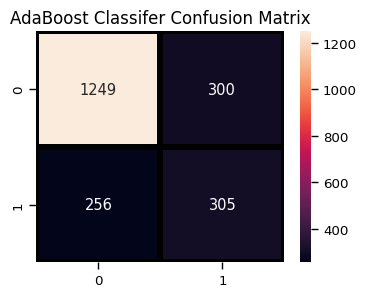

In [91]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            fmt="d",
           linecolor='k',
            linewidths=3           
           )
plt.title("AdaBoost Classifer Confusion Matrix", fontsize=12)
plt.show()

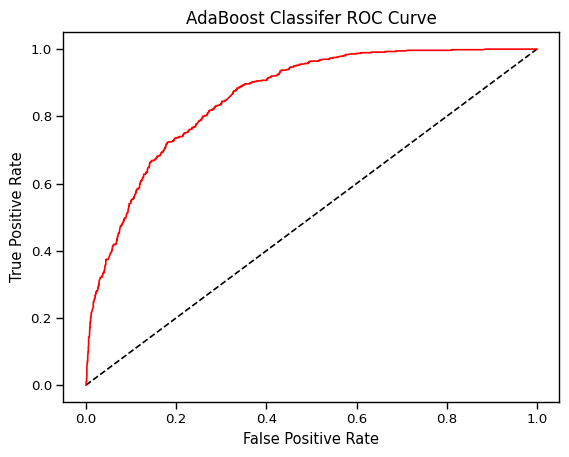

In [92]:
# ROC Curve
y_pred_prob = ad_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='AdaBoost Classifer', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Classifer ROC Curve', fontsize=12)
plt.show()

<a id="107"></a>
#### **7.0 Gradient Boosting Classifier**
<a id='ada'></a>

In [93]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classifer", accuracy_score(y_test,y_pred_gb))

Gradient Boosting Classifer 0.8028436018957346


In [94]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.65      0.55      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



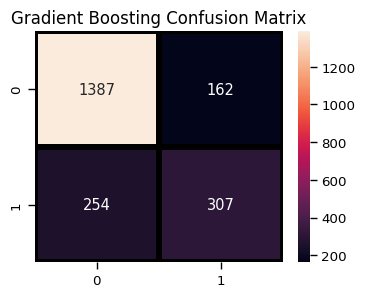

In [95]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred_gb),
           annot=True,
            fmt="d", linecolor='k', linewidths=3
           )
plt.title('Gradient Boosting Confusion Matrix', fontsize=12)
plt.show()

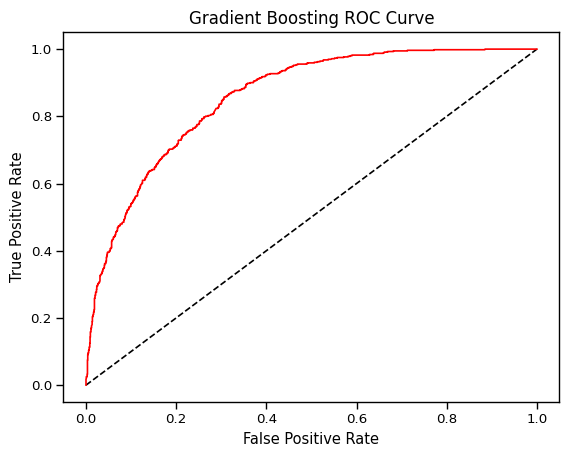

In [96]:
# ROC Curve
y_pred_prob = gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1], [0,1],'k--')
plt.plot(fpr, tpr, label='Gradient Boosting', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve', fontsize=12)
plt.show()

<a id = "108" ></a>
#### **Voting Classifier**
<a id = "vc" ></a>
Let's now predict the final model based on the highest majority of voting and check it's score.

In [97]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8156398104265403


In [98]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1549
           1       0.68      0.58      0.62       561

    accuracy                           0.82      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.81      0.82      0.81      2110



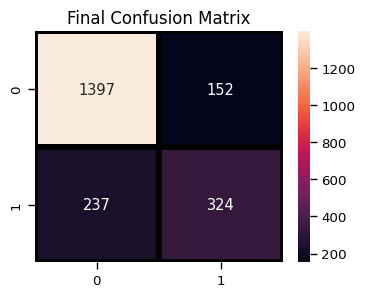

In [99]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
           annot=True,
           fmt='d', linecolor='k', linewidths=3
           )
plt.title("Final Confusion Matrix",fontsize=12)
plt.show()

* Top-left: True Negatives (TN) – Correctly predicted non-churn instances.
* Top-right: False Positives (FP) – Incorrectly predicted churn instances.
* Bottom-left: False Negatives (FN) – Incorrectly predicted non-churn instances.
* Bottom-right: True Positives (TP) – Correctly predicted churn instances.
* The color gradient represents the number of occurrences in each cell
* The X-axis and Y-axis are labeled with “0” and “1”, corresponding to the two classes (non-churn and churn)


In [100]:
non_churn_actual = 1397+152  # Model predicts 1397 as non churn (right prediction); 152 as churn of them (wrong prediction)
non_churn_actual

1549

In [101]:
churn_actual = 237+324  # While Model/algorithm predicts 237 as non churn(wrong prediction); and 324 of them as Churn (Right Prediction) 
churn_actual

561

In [102]:
# Model Right Predictions
model_correct_pred = 1397+324
# Model wrong Predictions
model_wrong_pred = 152+237

print(model_correct_pred)
print(model_wrong_pred)

1721
389


### Suggestions

- Customer Churning in considered to be bad for any organizational profitability & goodwill
- There are numbers of ways to eliminate this churning & here some tips has be shared below:

1. Properly Know & Monitor your customers
2. Develop KYC 
3. Properly identify the key risks factory that may causes of your customer churning, including idenfying factors and continously improve it
4. Engage in customer satisfaction process ( good serice, quality, commitments, sell sevice over selling goods
5. Regular monitoring
6. Exit interview / survey who already churnged

### Working!

Missingno is a Python library that provides a set of visualizations to help you understand the presence and distribution of missing data within a pandas dataframe. It’s a handy tool for data analysts and scientists dealing with messy datasets or datasets containing missing values. Let me give you an overview of some of its features:

Matrix Plot (msno.matrix):
The nullity matrix is a dense display that visually highlights patterns in data completion.
It allows you to quickly identify missing values in your dataset.
For example, you can use it like this

### HTML

The <a> tag in HTML stands for anchor. It is used to create hyperlinks within a web page. Let’s break down its meaning:

Hyperlink:
An anchor tag (<a>) defines a hyperlink, allowing users to navigate from one web page to another or to different sections within the same page.
When you click on a link (usually displayed as text or an image), it takes you to the specified destination.
Attributes:
The <a> tag has several attributes, with the most important one being href.
The href attribute specifies the URL (Uniform Resource Locator) to which the link points.
Example: <a href="https://www.example.com">Visit Example</a> creates a link that takes you to the “example.com” website when clicked.
Text Content:
The text or content inside the <a> tag is what users see as the clickable link.
Example: In <a href="https://www.example.com">Visit Example</a>, “Visit Example” is the visible link text.

## PLotly

Creating Subplots:
The make_subplots function is used to create a 1x2 grid of subplots (two side-by-side plots).
Each subplot will be a pie chart, represented by the 'domain' type.
Adding Pie Charts:
The first subplot (1, 1) represents the gender distribution.
It uses the 'gender' column from the DataFrame.
The labels for the pie chart are 'Male' and 'Female'.
The second subplot (1, 2) represents the churn distribution.
It uses the 'Churn' column from the DataFrame.
The labels for the pie chart are 'No' and 'Yes'.
Styling the Pie Charts:
The hole parameter is set to create a donut-like appearance for the pie charts.
The hoverinfo specifies what information is displayed when hovering over the chart segments.
The textfont_size sets the font size for the text labels.

In programming languages, the term “type domain” refers to a categorization or classification of data types.
Specifically, it groups related data types together based on certain characteristics.

<b>The add_trace() </b> method is used to add a new trace (such as a bar chart, scatter plot, etc.) to an existing Plotly figure. When creating complex visualizations with multiple components, you can use add_trace() to add additional data series or elements to the same plot.
You start by creating a Plotly figure (often named fig) using go.Figure() or another appropriate constructor. This initializes an empty figure.
Next, you create a trace (e.g., a bar chart) using go.Bar(), go.Scatter(), or other trace constructors. This trace represents a specific data series or visualization.
Finally, you use add_trace() to add the trace to the existing figure. 

#### Voting Classifer

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))  # Output: [1 1 1 2 2 2]


[1 1 1 2 2 2]
